In [1]:
library(vegan)
library('BAT')

cwm(mqu_spe, mqu_traits, abund = TRUE, na.rm = FALSE)


Loading required package: permute



ERROR: Error in library("BAT"): there is no package called ‘BAT’


In [19]:
library(tidyverse)   
library(readr)       
library(readxl)     
library(vegan)       
library(reshape2)  
library(dplyr)
library(randomForest)

In [20]:
# Load required packages
library(NbClust)

# Get data

In [21]:
spe <- read.delim ('https://raw.githubusercontent.com/zdealveindy/anadat-r/master/data/MQU_spe.txt', row.names = 1)
env <- read.delim ('https://raw.githubusercontent.com/zdealveindy/anadat-r/master/data/MQU_env.txt', row.names = 1)
traits <- read.delim ('https://raw.githubusercontent.com/zdealveindy/anadat-r/master/data/MQU_traits.txt', row.names = 1)
loc <- read.delim ('https://raw.githubusercontent.com/zdealveindy/anadat-r/master/data/MQU_loc.txt')

In [22]:
#spe <- t(spe)

In [23]:
head(spe)

,Acer.palmatum.var..pubescens,Acer.serrulatum,Ardisia.quinquegona,Barthea.barthei,Blastus.cochinchinensis,Camellia.brevistyla,Camellia.tenuifolia,Castanopsis.cuspidata.var..carlesii,Chamaecyparis.obtusa.var..formosana,Cinnamomum.kanehirae,⋯,Symplocos.wikstroemiifolia,Syzygium.buxifolium,Ternstroemia.gymnanthera,Tricalysia.dubia,Trochodendron.aralioides,Turpinia.formosana,Vaccinium.randaiense,Viburnum.foetidum.var..rectangulatum,Viburnum.integrifolium,Viburnum.taitoense
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
M01,0,0.00,4.94,0.00,9.49,0.00,0,4.16,0.00,0.00,⋯,0,0.00,0.00,0.42,0.00,0.00,0.0,0.00,0.00,0.00
M02,0,4.45,0.48,0.00,0.49,0.00,0,0.00,0.00,0.00,⋯,0,0.00,0.00,2.48,0.00,3.03,0.0,0.00,0.00,0.00
M03,0,0.00,0.18,0.00,21.31,0.00,0,0.92,0.00,5.06,⋯,0,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.00,0.00
Q01,0,0.00,0.00,0.16,0.00,0.00,0,0.00,0.17,0.00,⋯,0,12.37,0.00,0.00,0.00,0.00,3.1,0.00,0.00,0.00
Q02,0,0.00,0.00,0.00,0.00,0.41,0,0.00,0.00,0.00,⋯,0,0.00,1.53,0.00,0.00,0.00,0.2,0.00,0.00,5.36
Q03,0,0.00,0.00,0.00,0.00,0.00,0,0.00,0.00,0.00,⋯,0,0.00,0.32,0.00,0.32,0.00,0.0,1.93,0.32,0.63


# Compute chord distance matrix (abundance)


In [24]:
# Compute matrix of euclidian distances of the normalized datas among sites
spe.norm <- decostand(spe, "normalize") # normalize datas
spe.ch <- vegdist(spe.norm, "euc") # calculate the chord distance matrix (euclidean distance of normalized species data)

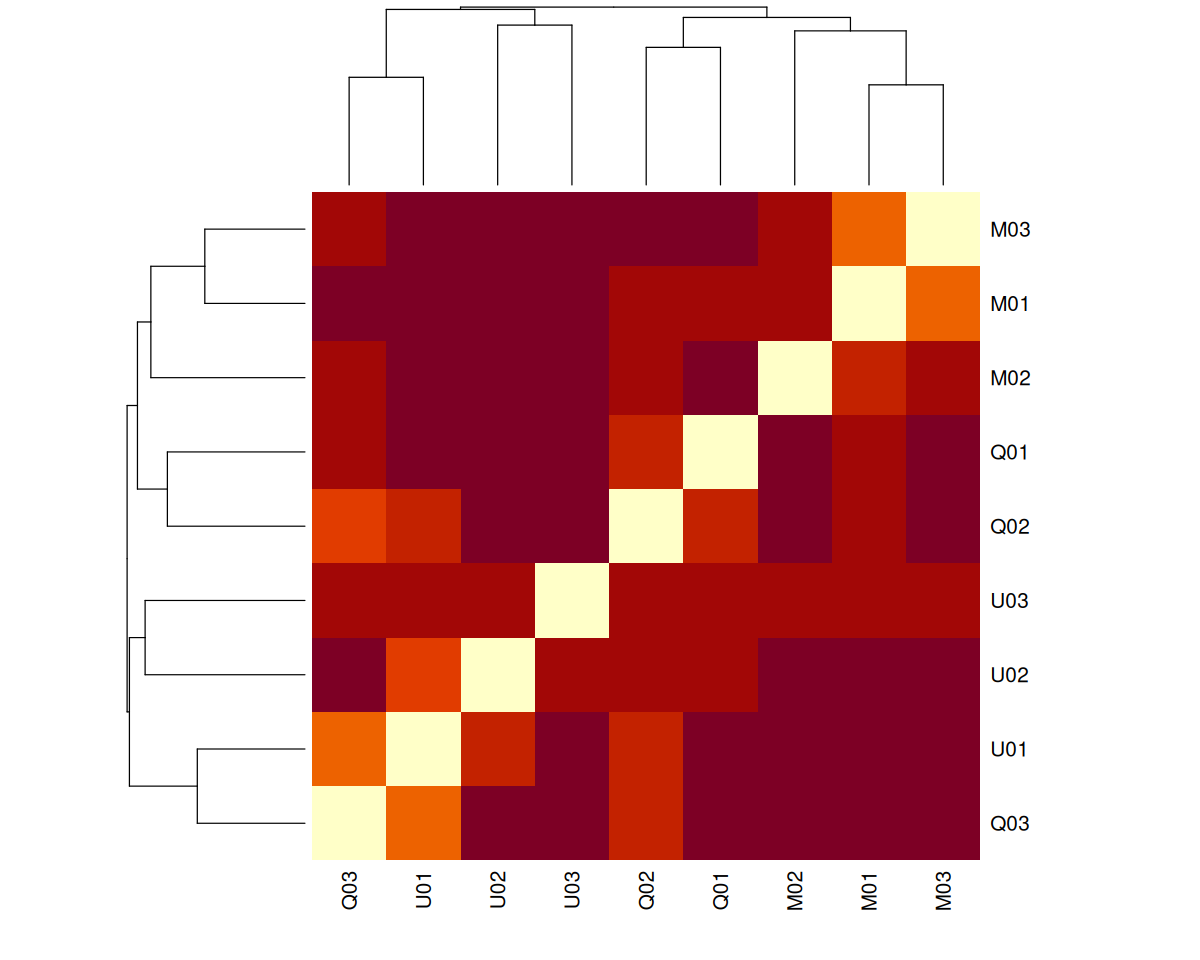

In [25]:
# Set plot size in Jupyter Notebook (10 x 8 inches)
options(repr.plot.width = 10, repr.plot.height = 8)
heatmap(as.matrix(spe.ch))

# Ward linkage

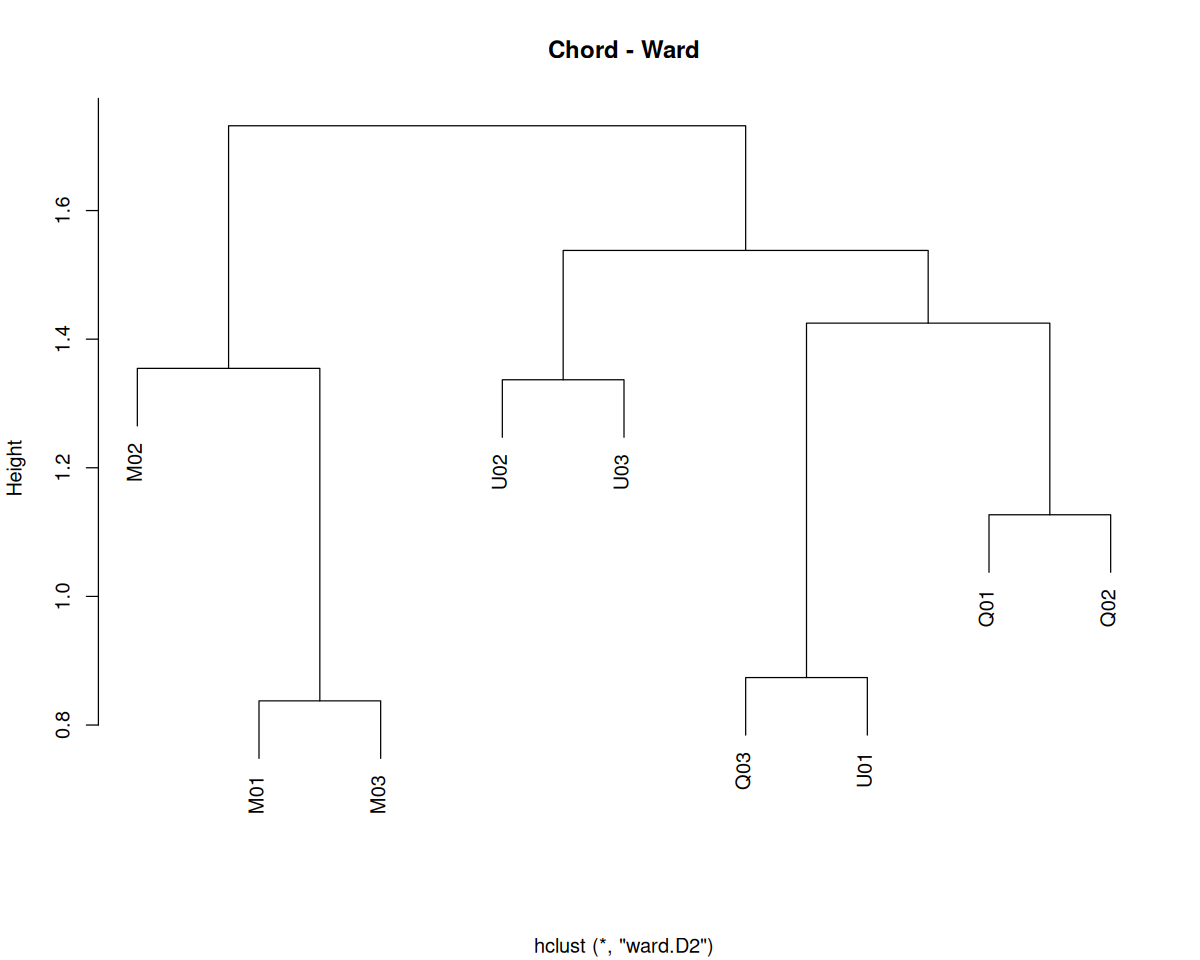

In [26]:
# Compute and plot Ward's minimum variance agglomerative clustering
spe.ch.ward <- hclust(spe.ch, method = "ward.D2")

# Set plot size in Jupyter Notebook (10 x 8 inches)
# Set plot size in Jupyter Notebook (10 x 8 inches)
options(repr.plot.width = 10, repr.plot.height = 8)

# Plot the dendrogram using default options
plot(spe.ch.ward,  main = "Chord - Ward", xlab="")

Cophonetic with Ward

In [27]:
# Compute the cophenetic distance matrix from the dendrogram obtained with Ward clustering
spe.ch.ward.coph <- cophenetic(spe.ch.ward)

# Compute the cophenetic correlation for Ward clustering
cor(spe.ch, spe.ch.ward.coph)

[1] 0.7870955

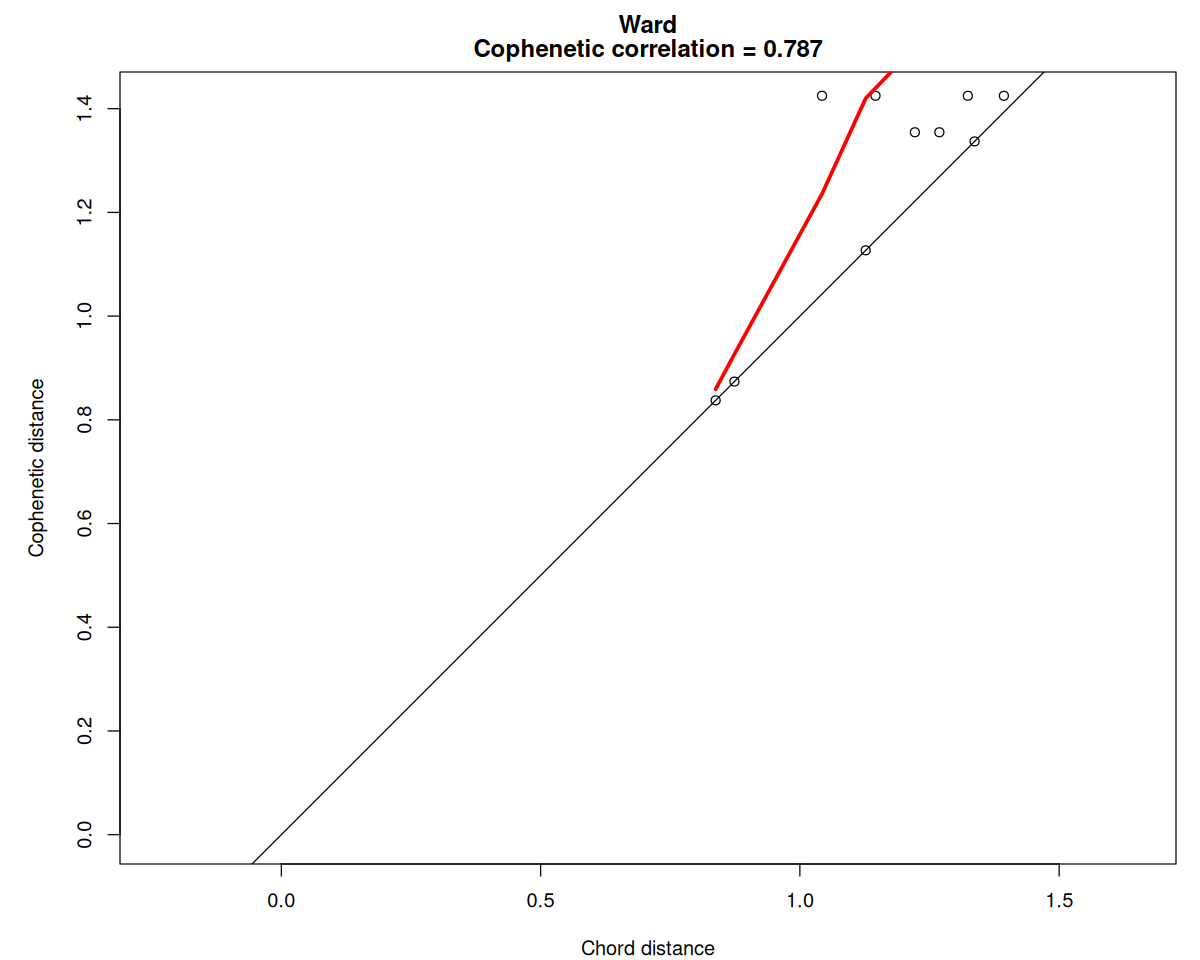

In [28]:
# Set plot size in Jupyter Notebook (10 x 8 inches)
options(repr.plot.width = 10, repr.plot.height = 8)

# Shepard diagram ---------------------------------------------------------
par(mfrow=c(1,1), mar=c(4,5,3,1))

plot(spe.ch, spe.ch.ward.coph, #initial chord distance against cophenetic distance from ward clustering
  xlab = "Chord distance",
  ylab = "Cophenetic distance",
  asp = 1, xlim = c(0, sqrt(2)),
  ylim = c(0, sqrt(2)),
  main = c("Ward", paste("Cophenetic correlation =", round(cor(spe.ch, spe.ch.ward.coph), 3))))
abline(0, 1)  # Add a 1:1 reference line (ideal match between distances)
lines(lowess(spe.ch, spe.ch.ward.coph), col = "red", lwd=3) # Add a LOWESS (locally weighted scatterplot smoothing) curve to visualize the trend

# Average clusters

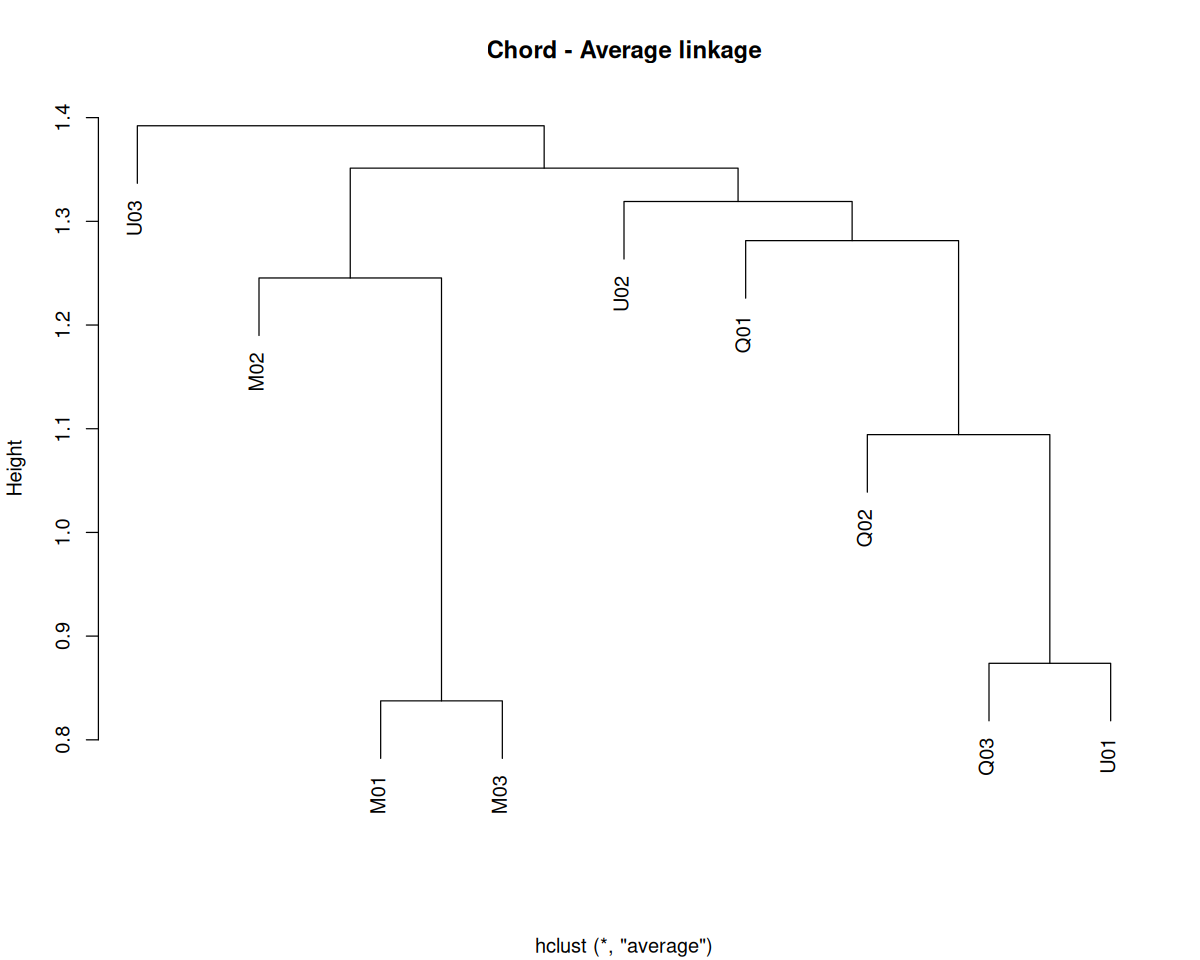

In [33]:
# Compute and plot Average linkage agglomerative clustering
spe.ch.average <- hclust(spe.ch, method = "average")

options(repr.plot.width = 10, repr.plot.height = 8)

# Plot the dendrogram using default options
plot(spe.ch.average,  main = "Chord - Average linkage", xlab="")

In [34]:
# Compute the cophenetic distance matrix from the dendrogram obtained with Average linkage clustering
spe.ch.average.coph <- cophenetic(spe.ch.average)

# Compute the cophenetic correlation for Average linkageclustering
cor(spe.ch, spe.ch.average.coph)

[1] 0.8986514

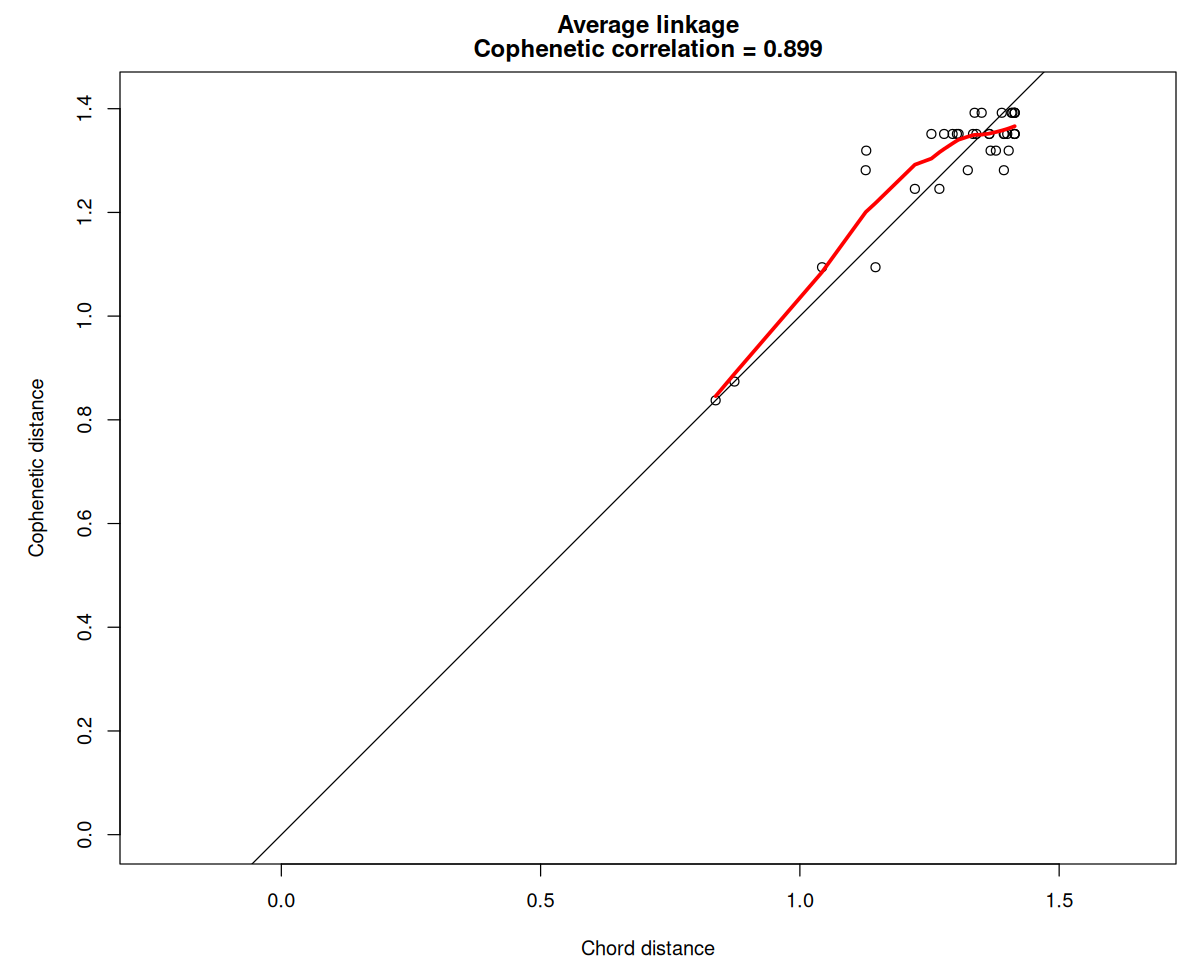

In [35]:
# Set plot size in Jupyter Notebook (10 x 8 inches)
options(repr.plot.width = 10, repr.plot.height = 8)

# Shepard diagram ---------------------------------------------------------
par(mfrow=c(1,1), mar=c(4,5,3,1))

plot(spe.ch, spe.ch.average.coph, #initial chord distance against cophenetic distance from Average linkage clustering
  xlab = "Chord distance",
  ylab = "Cophenetic distance",
  asp = 1, xlim = c(0, sqrt(2)),
  ylim = c(0, sqrt(2)),
  main = c("Average linkage", paste("Cophenetic correlation =", round(cor(spe.ch, spe.ch.average.coph), 3))))
abline(0, 1)  # Add a 1:1 reference line (ideal match between distances)
lines(lowess(spe.ch, spe.ch.average.coph), col = "red", lwd=3) # Add a LOWESS (locally weighted scatterplot smoothing) curve to visualize the trend